In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('DATA COVID19 PREDICTION ANONYMOUS 20.4.xlsx', sheet_name='מטופלים השהיה פעיל', skiprows=[0])
df.head()
df.columns
features= ['Epidemiology', 'Fever', 'URTS', 'LRTS', 'GIS',
       'Flu like symptoms', 'Extreme fatigue','CXR','Leukocytes count',' diagnosis']

target = 'PCR'
other_predictors = ['PROBABILITY','Gestalt','Score to PCR matching','Gestalt to PCR matching']

x = df[features]
y=df[target]
y.replace('Positive',1, inplace=True)
y.replace('Negative',0, inplace=True)
print(y.mean(), len(y))
x.columns = ['Epidemiology', 'Fever', 'URTS', 'LRTS', 'GIS',
       'Flu like symptoms', 'Extreme fatigue','CXR','Leukocytes count','Other likely diagnosis']

0.36464088397790057 182


In [250]:
df.head()

,Hosp. No,Epidemiology,Fever,URTS,LRTS,GIS,Flu like symptoms,Extreme fatigue,Clinical score,Clinical score final,...,Unnamed: 16,PROBABILITY,Gestalt,Unnamed: 19,PCR,Unnamed: 21,Score to PCR matching,Gestalt to PCR matching,Unnamed: 24,הערות
0,11674150,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2,2,...,NaN,high probability,Positive,2,Positive,2,match,match,2,NaN
1,11674138,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,2,...,NaN,high probability,Doubtfull,2,Negative,0,not match,non predictive,1,NaN
2,11674124,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2,2,...,Lymphopenia W/O Leukocytosis,high probability,Positive,2,Positive,2,match,match,2,NaN
3,11674098,NaN,1.0,NaN,1.0,1.0,NaN,NaN,3,2,...,Normal/other CBC,high probability,Positive,2,Positive,2,match,match,2,NaN
4,11674109,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1,0,...,Leuko>15K/Neutr>90%,low risk,Negative,0,Negative,0,match,match,0,NaN


C:\Users\212778050\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


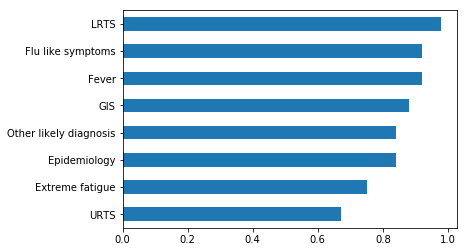

In [239]:
np.round(x.describe().ix['mean'],2).sort_values().plot(kind='barh')
plt.show()

C:\Users\212778050\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


['Multifocal Infiltrates' 'Normal XR' 'Interstitial infiltrates'
 'non suggestive to COVID']


C:\Users\212778050\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


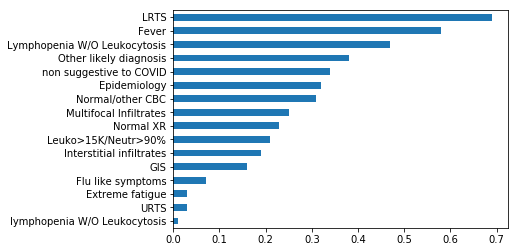

In [240]:
#cleaninig the data

for col in ['Epidemiology', 'Fever', 'URTS', 'LRTS', 'GIS','Flu like symptoms', 'Extreme fatigue','Other likely diagnosis']:
    x[col].fillna(0,inplace=True)


x['CXR'].fillna('Normal XR',inplace=True)
print(x['CXR'].unique())
# x['CXR'] = x['CXR'].astype('category')
# x['CXR_Cat'] = x['CXR'].cat.codes
cxr_dummies = pd.get_dummies(x['CXR'])
x = x.merge(cxr_dummies, how='inner', left_index=True , right_index=True)


x['Leukocytes count'].fillna('Normal blood count',inplace=True)
# x['Leukocytes count'] = x['Leukocytes count'].astype('category')
# x['Leukocytes count_Cat'] = x['Leukocytes count'].cat.codes
Leukocytes_dummies = pd.get_dummies(x['Leukocytes count'])
x = x.merge(Leukocytes_dummies, how='inner', left_index=True , right_index=True)

if 'CXR' in x.columns:
    del x['CXR']
if 'Leukocytes count' in x.columns:
    del x['Leukocytes count']
    
y.fillna(0,inplace=True)

np.round(x.describe().ix['mean'],2).sort_values().plot(kind='barh')
plt.show()


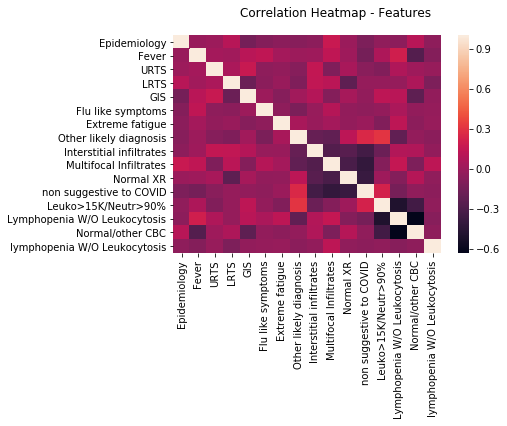

In [241]:
sns.heatmap(x.corr())
plt.suptitle('Correlation Heatmap - Features')
plt.show()



In [226]:
# add pair correlations to feature list
# import itertools as it
# mainlist = ['Epidemiology', 'Fever', 'URTS', 'LRTS', 'GIS','Flu like symptoms', 'Extreme fatigue','Other likely diagnosis']
# for a,b in it.combinations(mainlist, 2):
#     x[a+'_'+b]  = x[a]*x[b]

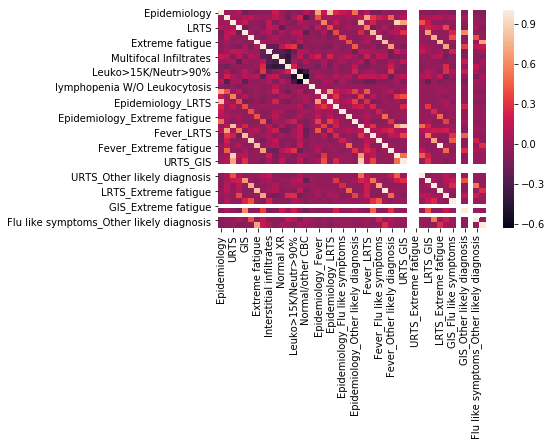

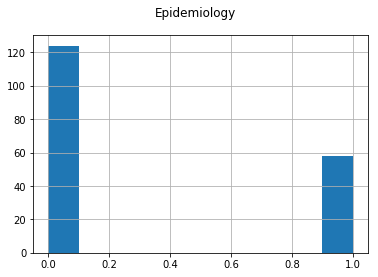

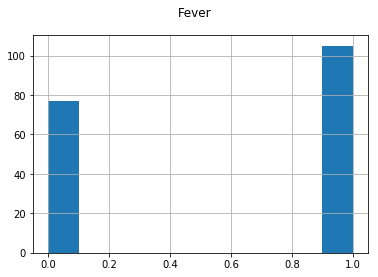

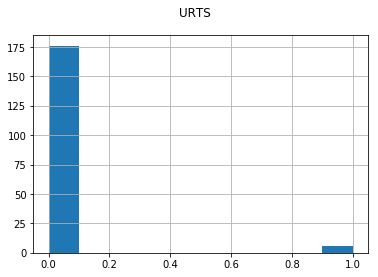

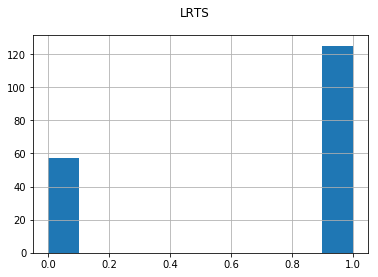

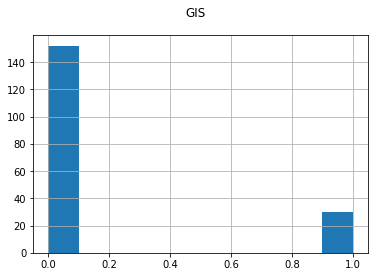

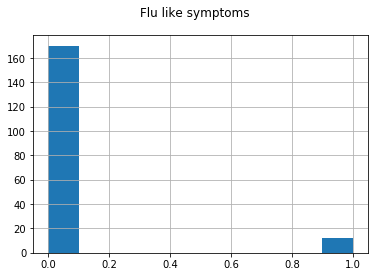

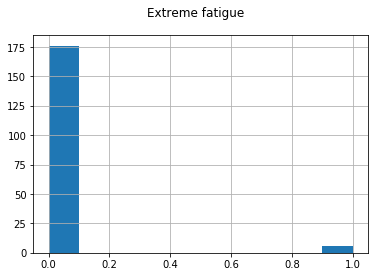

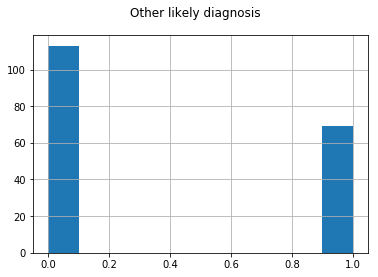

KeyError: 'CXR_Cat'

In [227]:
import seaborn as sns
sns.heatmap(x.corr())
plt.show()
for col in feature_list:
    x[col].hist()
    plt.suptitle(col)
    plt.show()

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=0.3, random_state=1)

# # Explore Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( random_state=0,bootstrap=True)
clf.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
def plot_roc(clf):
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    

def calc_errors_Accuracy(df_pred,y_test):
    errors = abs(df_pred - y_test)
    print("Accuracy:",round(1-np.mean(errors),2))
    
def plot_precision_recall_curve(df_actual,precision,recall):
    # plot the precision-recall curves
    no_skill = len(df_actual[df_actual == 1]) / len(df_actual)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='NN')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Variable: Multifocal Infiltrates Importance: 0.15
Variable: Other likely diagnosis Importance: 0.14
Variable: Epidemiology         Importance: 0.11
Variable: LRTS                 Importance: 0.09
Variable: non suggestive to COVID Importance: 0.08
Variable: Fever                Importance: 0.07
Variable: GIS                  Importance: 0.05
Variable: Normal XR            Importance: 0.05
Variable: Lymphopenia W/O Leukocytosis Importance: 0.05
Variable: Normal/other CBC     Importance: 0.05
Variable: URTS                 Importance: 0.04
Variable: Flu like symptoms    Importance: 0.04
Variable: Interstitial infiltrates Importance: 0.04
Variable: Leuko>15K/Neutr>90%  Importance: 0.04
Variable: Extreme fatigue      Importance: 0.01
Variable: lymphopenia W/O Leukocytosis Importance: 0.0



Results from simple Random Forest
RF: f1=0.718 auc=0.826
RF: Recall Score=0.778 
RF: Precision Score =0.667 
Accuracy: 0.8
RF: confusion_matrix =
[[30  7]
 [ 4 14]]


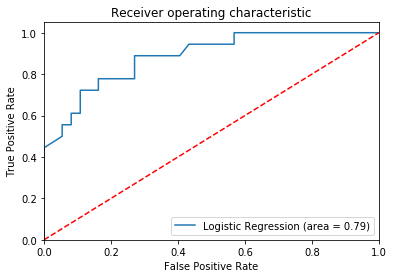

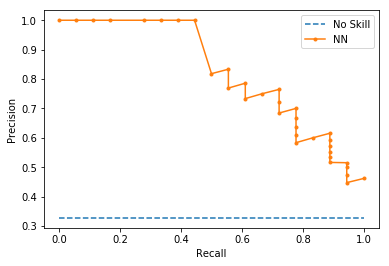




Results from simple Logistic Regression
LR: f1=0.778 auc=0.874
LR: Recall Score=0.778 
LR: Precision Score =0.778 
Accuracy: 0.85
LR: confusion_matrix =
[[33  4]
 [ 4 14]]


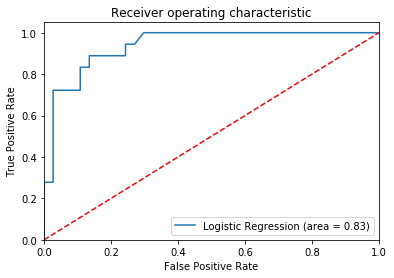

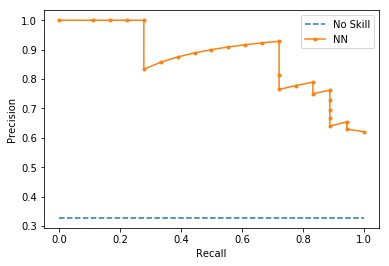




Results from Score to PCR matching
f1=0.540 auc=0.670
Recall Score=0.944 
Precision Score =0.378 
Accuracy: 0.47
RF: confusion_matrix =
[[ 9 28]
 [ 1 17]]


C:\Users\212778050\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


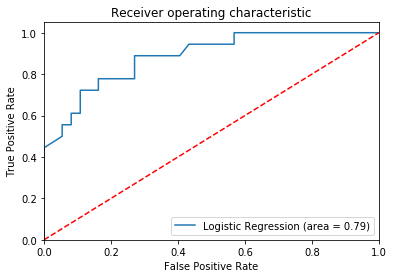

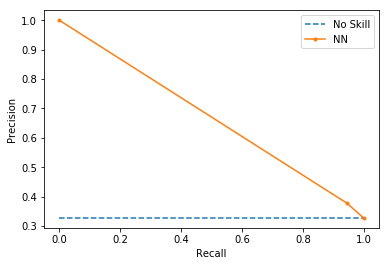

In [243]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

print()
print()
print()
print('Results from simple Random Forest')
df_pred = clf.predict_proba(X_test)
df_actual = y_test
precision, recall, thresholds = precision_recall_curve(df_actual, df_pred[:,1])
df_pred = clf.predict(X_test)
f1 = f1_score(df_actual, df_pred)
lr_f1, lr_auc = f1_score(df_actual, df_pred), auc(recall, precision)

from sklearn.metrics import recall_score,precision_score,confusion_matrix
print('RF: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('RF: Recall Score=%.3f ' % (recall_score(df_actual, df_pred)))
print('RF: Precision Score =%.3f ' % (precision_score(df_actual, df_pred)))
calc_errors_Accuracy(df_pred,y_test)
print('RF: confusion_matrix =' )
print(confusion_matrix(df_actual, df_pred))
plot_roc(clf)
plot_precision_recall_curve(df_actual,precision,recall)

###########################################################
print()
print()
print()
print('Results from simple Logistic Regression')
df_pred = clf_lr.predict_proba(X_test)
df_actual = y_test
precision, recall, thresholds = precision_recall_curve(df_actual, df_pred[:,1])
df_pred = clf_lr.predict(X_test)
f1 = f1_score(df_actual, df_pred)
lr_f1, lr_auc = f1_score(df_actual, df_pred), auc(recall, precision)

from sklearn.metrics import recall_score,precision_score,confusion_matrix
print('LR: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('LR: Recall Score=%.3f ' % (recall_score(df_actual, df_pred)))
print('LR: Precision Score =%.3f ' % (precision_score(df_actual, df_pred)))
calc_errors_Accuracy(df_pred,y_test)
print('LR: confusion_matrix =' )
print(confusion_matrix(df_actual, df_pred))
plot_roc(clf_lr)
plot_precision_recall_curve(df_actual,precision,recall)

###########################################################

print()
print()
print()
print('Results from Score to PCR matching')
df_pred = df.ix[X_test.index]['Score to PCR matching']
df_pred.replace('non predictive',0,inplace=True)
df_pred.replace('not match',0,inplace=True)
df_pred.replace('match',1,inplace=True)

df_actual = y_test
precision, recall, thresholds = precision_recall_curve(df_actual, df_pred)
f1 = f1_score(df_actual, df_pred)
lr_f1, lr_auc = f1_score(df_actual, df_pred), auc(recall, precision)

from sklearn.metrics import recall_score,precision_score,confusion_matrix
print('f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Recall Score=%.3f ' % (recall_score(df_actual, df_pred)))
print('Precision Score =%.3f ' % (precision_score(df_actual, df_pred)))
calc_errors_Accuracy(df_pred,y_test)
print('RF: confusion_matrix =' )
print(confusion_matrix(df_actual, df_pred))
plot_roc(clf)
plot_precision_recall_curve(df_actual,precision,recall)

###########################################################
# print()
# print()
# print()
# print('Results Gestalt from PCR matching')
# df_pred = df.ix[X_test.index]['Gestalt to PCR matching']
# df_pred.replace('non predictive',0,inplace=True)
# df_pred.replace('not match',0,inplace=True)
# df_pred.replace('match',1,inplace=True)
# df_actual = y_test
# precision, recall, thresholds = precision_recall_curve(df_actual, df_pred)
# f1 = f1_score(df_actual, df_pred)
# lr_f1, lr_auc = f1_score(df_actual, df_pred), auc(recall, precision)

# from sklearn.metrics import recall_score,precision_score,confusion_matrix
# print('RF: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# print('RF: Recall Score=%.3f ' % (recall_score(df_actual, df_pred)))
# print('RF: Precision Score =%.3f ' % (precision_score(df_actual, df_pred)))
# calc_errors_Accuracy(df_pred,y_test)
# print('RF: confusion_matrix =' )
# print(confusion_matrix(df_actual, df_pred))
# plot_roc(clf)
# plot_precision_recall_curve(df_actual,precision,recall)

# ###########################################################

In [235]:

# 
from sklearn.model_selection import cross_validate
predicted = cross_validate(clf_lr, x, y, cv=5, scoring=('accuracy','precision', 'recall', 'f1', 'neg_mean_squared_error'))
print(predicted)
print()
from sklearn.model_selection import cross_validate
predicted = cross_validate(clf, x, y, cv=5, scoring=('accuracy','precision', 'recall', 'f1', 'neg_mean_squared_error'))
print(predicted)





{'fit_time': array([0.00598001, 0.00498295, 0.00598431, 0.00499105, 0.00496387]), 'score_time': array([0.00398684, 0.00398755, 0.0040071 , 0.00300932, 0.00299144]), 'test_accuracy': array([0.81081081, 0.78378378, 0.75      , 0.77777778, 0.75      ]), 'test_precision': array([0.81818182, 0.72727273, 0.66666667, 0.69230769, 0.64285714]), 'test_recall': array([0.64285714, 0.61538462, 0.61538462, 0.69230769, 0.69230769]), 'test_f1': array([0.72      , 0.66666667, 0.64      , 0.69230769, 0.66666667]), 'test_neg_mean_squared_error': array([-0.18918919, -0.21621622, -0.25      , -0.22222222, -0.25      ])}

{'fit_time': array([0.09767127, 0.09724569, 0.09977555, 0.09792924, 0.09793806]), 'score_time': array([0.0080204 , 0.00797486, 0.00793934, 0.00797391, 0.00796771]), 'test_accuracy': array([0.78378378, 0.78378378, 0.77777778, 0.77777778, 0.75      ]), 'test_precision': array([0.71428571, 0.69230769, 0.77777778, 0.69230769, 0.64285714]), 'test_recall': array([0.71428571, 0.69230769, 0.538461

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_all = pd.read_excel('DATA OF HASHAYA PTS.xlsx', encoding='ISO-8859-15')
df.head()
df_all.rename(columns={'מספר אשפוז':'id'}, inplace=True)


df = pd.read_excel('DATA COVID19 PREDICTION ANONYMOUS 20.4.xlsx', sheet_name='מטופלים השהיה פעיל', skiprows=[0])
df.head()

len(df_all['id'].unique()) , len(df),len(set(df_all['id'].unique())-set(df['Hosp. No']))
df_all[df_all['id'].isin(list(set(df_all['id'].unique())-set(df['Hosp. No'])))]
df_all[df_all['id'].isin(list(set(df_all['id'].unique())-set(df['Hosp. No'])))].to_csv('Leftover_patients.csv', index=False)